In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [54]:
car = pd.read_csv("C:/Users/진현킴/Downloads/car.data")

In [55]:
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in car.columns :
    car[i] = le.fit_transform(car[i])

In [57]:
car.dropna()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


Text(0.5, 1.0, 'unacc')

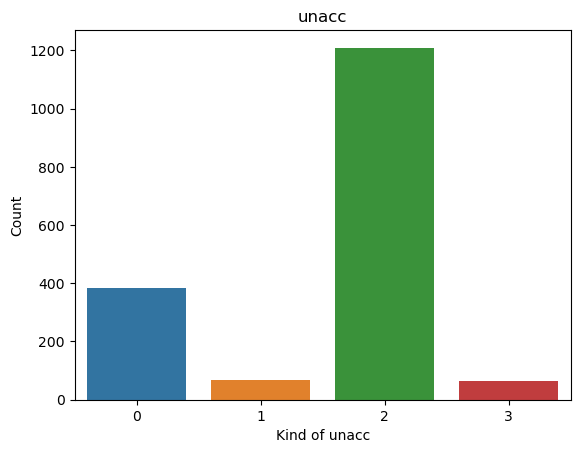

In [58]:
import seaborn as sns
sns.countplot(data = car, x="unacc")
plt.xlabel("Kind of unacc")
plt.ylabel("Count")
plt.title("unacc")

In [59]:
n_features = 1
X = car.drop('low',axis=1)
X 

,vhigh,vhigh.1,2,2.1,small,unacc
0,3,3,0,0,2,2
1,3,3,0,0,2,2
2,3,3,0,0,1,2
3,3,3,0,0,1,2
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1722,1,1,3,2,1,1
1723,1,1,3,2,1,3
1724,1,1,3,2,0,2
1725,1,1,3,2,0,1


In [60]:
X = car.iloc[:,0:5].values
X

array([[3, 3, 0, 0, 2],
       [3, 3, 0, 0, 2],
       [3, 3, 0, 0, 1],
       ...,
       [1, 1, 3, 2, 0],
       [1, 1, 3, 2, 0],
       [1, 1, 3, 2, 0]])

In [61]:
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = car.iloc[:,6].values

In [62]:
from sklearn.preprocessing import LabelEncoder
## from keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
## y_one_hot = to_categorical(y_encoded, num_classes=2)
Y = pd.get_dummies(y_encoded).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [63]:
import numpy as np

mean = np.mean(X_train, axis = 0)

std = np.std(X_train, axis = 0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [64]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [65]:
print(y_train.shape)
print(y_test.shape)

(1381, 4)
(346, 4)


In [66]:
n_steps = X.shape[1]
n_steps

5

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [74]:
model =Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])

print("input_shape => ", n_steps, n_features)
model.summary()  

input_shape =>  5 1
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 4, 64)             192       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2, 64)            0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                6450      
                                                                 
 dense_10 (Dense)            (None, 25)                1275      
                                                                 
 dense_11 (Dense)            (None, 4)                 104       
                                  

In [75]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, batch_size=64, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
22/22 [==============================] - 2s 24ms/step - loss: 0.1277 - mae: 0.2767 - val_loss: 0.1106 - val_mae: 0.2355
Epoch 2/100
22/22 [==============================] - 0s 8ms/step - loss: 0.1045 - mae: 0.2242 - val_loss: 0.1037 - val_mae: 0.2290
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0996 - mae: 0.2135 - val_loss: 0.1009 - val_mae: 0.2114
Epoch 4/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0970 - mae: 0.2056 - val_loss: 0.0996 - val_mae: 0.2023
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0957 - mae: 0.2028 - val_loss: 0.0985 - val_mae: 0.2011
Epoch 6/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0944 - mae: 0.2004 - val_loss: 0.0971 - val_mae: 0.2004
Epoch 7/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0929 - mae: 0.1992 - val_loss: 0.0977 - val_mae: 0.1905
Epoch 8/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0928 - 

22/22 [==============================] - 0s 8ms/step - loss: 0.0714 - mae: 0.1496 - val_loss: 0.0855 - val_mae: 0.1676
Epoch 64/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0715 - mae: 0.1492 - val_loss: 0.0855 - val_mae: 0.1625
Epoch 65/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0712 - mae: 0.1492 - val_loss: 0.0860 - val_mae: 0.1573
Epoch 66/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0714 - mae: 0.1492 - val_loss: 0.0863 - val_mae: 0.1591
Epoch 67/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0718 - mae: 0.1486 - val_loss: 0.0854 - val_mae: 0.1619
Epoch 68/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0706 - mae: 0.1476 - val_loss: 0.0861 - val_mae: 0.1633
Epoch 69/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0719 - mae: 0.1490 - val_loss: 0.0831 - val_mae: 0.1654
Epoch 70/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0709 - mae: 0

In [76]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.0901 - mae: 0.1595


[0.09005310386419296, 0.1595245599746704]

In [77]:
loss = model.evaluate(X_test, y_test)
print(f"평균 제곱 오차 (MSE): {loss}")

11/11 [==============================] - 0s 3ms/step - loss: 0.0901 - mae: 0.1595
평균 제곱 오차 (MSE): [0.09005310386419296, 0.1595245599746704]


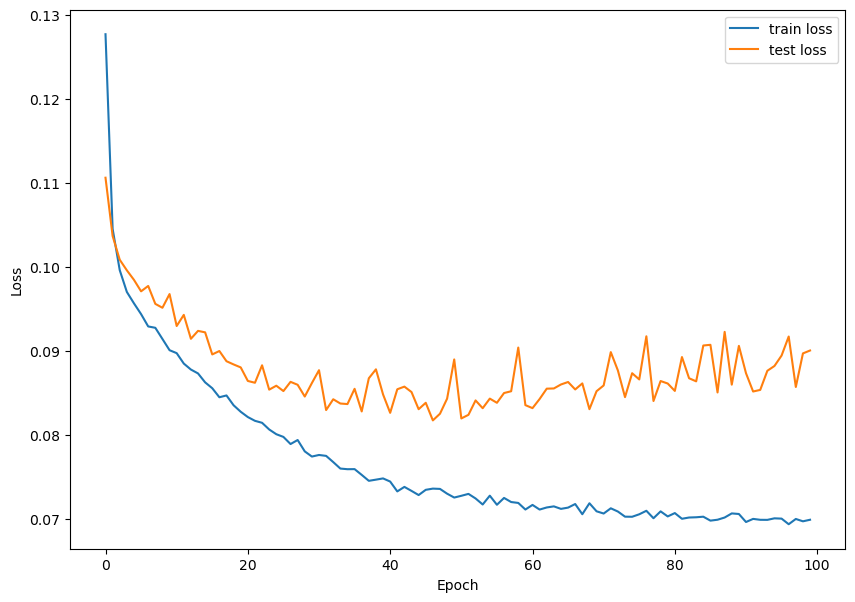

In [78]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

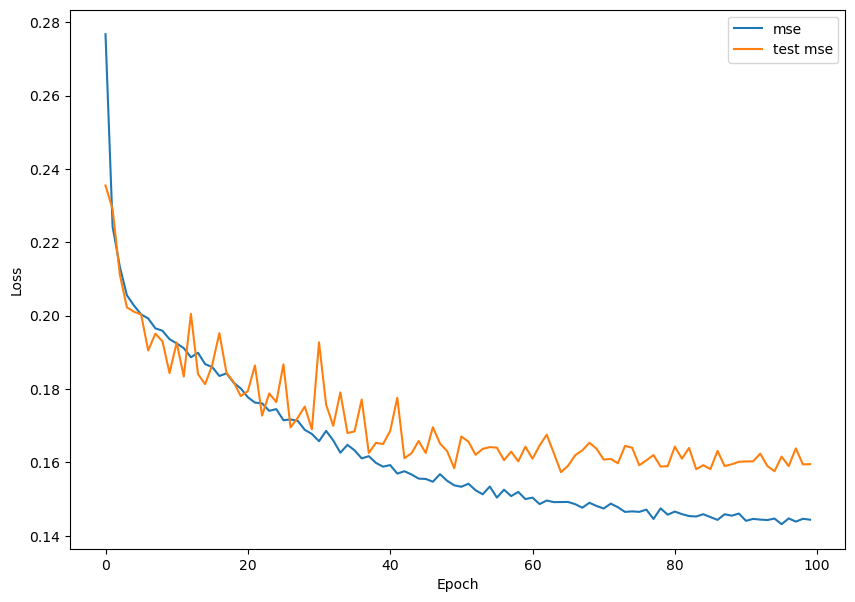

In [81]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()